# 서울 상공업 데이터
* 코로나의 여파로 자영업 및 상공업의 타격이 크다고 하는데 정량적으로 그 영향을 확인할 수 있을까?

## 다루는 내용
* 전체적으로 코로나가 영업/폐업의 영향을 미치는 것을 확인하고자 한다.
* 코로나 발생 기준을 2019.12월로 잡고 코로나 기간 사이에 폐업한 영업장을 파악하여 근 5년, 10년 사이 폐업장수와 비교한다.
* 어떤 부문의 업종과 영업장이 (절대적으로) 큰 수의 타격을 입었는지 폐업현황과 영업일수를 통해 확인한다.
* 코로나 기간에 인허가를 받고 동시에 폐업을 한 업종 역시 확인한다.
* 지역을 구분하여 서울 내 어떤 상권이 피해를 입었는지 확인하다.

## 데이터셋
* 지방행정인허가데이터 : https://www.localdata.go.kr/devcenter/dataDown.do?menuNo=20001


# 라이브러리 불러오기

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트설정

In [3]:
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 데이터 불러오기

In [151]:
df0 = pd.read_csv("./6110000_서울특별시_03_05_05_P_인터넷컴퓨터게임시설제공업.csv", encoding="cp949")
df1 = pd.read_csv("./6110000_서울특별시_03_05_06_P_일반게임제공업.csv", encoding="cp949")
df2 = pd.read_csv("./6110000_서울특별시_03_05_07_P_청소년게임제공업.csv" ,encoding="cp949")
df3 = pd.read_csv("./6110000_서울특별시_03_06_01_P_공연장.csv" ,encoding="cp949")
df4 = pd.read_csv("./6110000_서울특별시_03_09_01_P_노래연습장업.csv" ,encoding="cp949")
df5 = pd.read_csv("./6110000_서울특별시_03_11_03_P_숙박업.csv" ,encoding="cp949")
df6 = pd.read_csv("./6110000_서울특별시_03_12_02_P_국외여행업.csv" ,encoding="cp949")
df7 = pd.read_csv("./6110000_서울특별시_05_18_01_P_미용업.csv" ,encoding="cp949")
df8 = pd.read_csv("./6110000_서울특별시_05_19_01_P_이용업.csv" ,encoding="cp949")
df9 = pd.read_csv("./6110000_서울특별시_06_20_01_P_세탁업.csv" ,encoding="cp949")
df10 = pd.read_csv("./6110000_서울특별시_07_22_18_P_제과점영업.csv" ,encoding="cp949")
df11 = pd.read_csv("./6110000_서울특별시_07_23_01_P_단란주점영업.csv" ,encoding="cp949")
df12 = pd.read_csv("./6110000_서울특별시_07_23_02_P_유흥주점영업.csv" ,encoding="cp949")
df13 = pd.read_csv("./6110000_서울특별시_07_24_04_P_일반음식점.csv" ,encoding="cp949")
df14 = pd.read_csv("./6110000_서울특별시_07_24_05_P_휴게음식점.csv" ,encoding="cp949")
df15 = pd.read_csv("./6110000_서울특별시_08_26_02_P_방문판매업.csv" ,encoding="cp949")
df16 = pd.read_csv("./6110000_서울특별시_10_31_01_P_골프연습장업.csv" ,encoding="cp949")
df17 = pd.read_csv("./6110000_서울특별시_10_31_03_P_등록체육시설업.csv" ,encoding="cp949")
df18 = pd.read_csv("./6110000_서울특별시_10_32_01_P_당구장업.csv" ,encoding="cp949")
df19 = pd.read_csv("./6110000_서울특별시_10_41_01_P_체육도장업.csv" ,encoding="cp949")
df20 = pd.read_csv("./6110000_서울특별시_10_42_01_P_체력단련장업.csv" ,encoding="cp949")

C:\Users\dissi\anaconda31\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\dissi\anaconda31\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\dissi\anaconda31\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,16,22,27,39,41,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\dissi\anaconda31\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (16,39,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=comp

## 필요한 columns 추출

In [194]:

cols = ["개방서비스명", "인허가일자", "영업상태명", "상세영업상태명", "폐업일자", 
        "소재지전체주소", "도로명전체주소", "사업장명", "좌표정보(x)", "좌표정보(y)"]
df0 = df0[cols].copy()
df1 = df1[cols].copy()
df2 = df2[cols].copy()
df3 = df3[cols].copy()
df4 = df4[cols].copy()
df5 = df5[cols].copy()
df6 = df6[cols].copy()
df7 = df7[cols].copy()
df8 = df8[cols].copy()
df9 = df9[cols].copy()
df10 = df10[cols].copy()
df11 = df11[cols].copy()
df12 = df12[cols].copy()
df13 = df13[cols].copy()
df14 = df14[cols].copy()
df15 = df15[cols].copy()
df16 = df16[cols].copy()
df17 = df17[cols].copy()
df18 = df18[cols].copy()
df19 = df19[cols].copy()
df20 = df20[cols].copy()

In [13]:
df0.shape

(16066, 10)

## 데이터 취합

In [17]:
df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20])

In [18]:
df.shape

(818457, 10)

## 데이터 새로 저장

In [19]:
df.to_csv("seoul_financial.csv", index=False)

In [4]:
df = pd.read_csv("./seoul_financial.csv")
df.info()

C:\Users\dissi\anaconda31\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,4,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818457 entries, 0 to 818456
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   개방서비스명   818457 non-null  object 
 1   인허가일자    818454 non-null  object 
 2   영업상태명    818457 non-null  object 
 3   상세영업상태명  818268 non-null  object 
 4   폐업일자     564287 non-null  object 
 5   소재지전체주소  814255 non-null  object 
 6   도로명전체주소  440663 non-null  object 
 7   사업장명     818456 non-null  object 
 8   좌표정보(x)  765299 non-null  float64
 9   좌표정보(y)  765299 non-null  object 
dtypes: float64(1), object(9)
memory usage: 62.4+ MB


# 데이터 전처리

* 2019.12 - 20210130 코로나 기간
* 편이를 위해 '2020'년과 다른 년도 비교

In [5]:
# 폐업일자 숫자화 및 이상치 제거 / 20210202=분석 및 데이터 다운로드일 기준, 2010년 이후 폐업 데이터로  df_seoul 생성

df["폐업일자상세"] = pd.to_numeric(df["폐업일자"], errors='coerce')
df_seoul = df[(df["폐업일자상세"] < 20210202.0) & (df["폐업일자상세"] > 20100000.0) | (df["폐업일자상세"].isnull()) ].copy()
df_seoul["폐업일자상세"].max()

20210130.0

In [6]:
df_seoul.shape

(485377, 11)

In [7]:
df_seoul.sample(10)

,개방서비스명,인허가일자,영업상태명,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,좌표정보(x),좌표정보(y),폐업일자상세
45080,숙박업,20030226,영업/정상,영업,NaN,서울특별시 중구 신당동 121-56번지,서울특별시 중구 다산로42길 29 (신당동),재화여관,201517.623066,451376,NaN
800338,당구장업,20091007,폐업,폐업,20110419.0,서울특별시 성북구 종암동 69-5번지,서울특별시 성북구 종암로19길 17 (종암동),JJ당구장,202914.272616,455091,20110419.0
66556,미용업,20050628,영업/정상,영업,NaN,서울특별시 송파구 문정동 145번지 문정시영아파트상가1층106호,"서울특별시 송파구 송이로31길 52 (문정동, 문정시영아파트상가1층 106호)",최정희 헤어샵,211908.776683,443164,NaN
120713,미용업,20090123,폐업,폐업,2.01307e+07,서울특별시 강북구 미아동 343-2번지 (솔샘길 116-8),"서울특별시 강북구 도봉로29길 71 (미아동,(솔샘길 116-8))",샤론 미용실,202074.249053,457520,20130724.0
213538,일반음식점,19900514,영업/정상,영업,NaN,서울특별시 성동구 행당동 159-6번지 1층,"서울특별시 성동구 마조로3길 7-1, 1층 (행당동)",베네토피자앤펍,203432.595002,450690,NaN
492261,일반음식점,20110321,폐업,폐업,20171106,서울특별시 광진구 중곡동 221-2번지 1층,"서울특별시 광진구 능동로49길 15, 1층 (중곡동)",사누끼,207208.609717,451354,20171106.0
280455,일반음식점,19890317,영업/정상,영업,NaN,서울특별시 동작구 흑석동 86-74번지,서울특별시 동작구 서달로10길 6 (흑석동),원조꼬끼오숯불통닭,196540.796539,444914,NaN
209526,일반음식점,20170817,영업/정상,영업,NaN,서울특별시 송파구 신천동 29번지,"서울특별시 송파구 올림픽로 300, 지하1층 (신천동, 롯데월드몰)",어반스커트 롯데월드점,209074.900840,445658,NaN
268862,일반음식점,20021212,영업/정상,영업,NaN,서울특별시 구로구 구로동 1124-58번지,서울특별시 구로구 디지털로32나길 15 (구로동),전봇대 오뎅,191106.223790,442411,NaN
170888,제과점영업,20090520,영업/정상,영업,NaN,서울특별시 관악구 신림동 408-40번지 지상1층,"서울특별시 관악구 신림로 199 (신림동,지상1층)",파리바게뜨신림신화점,194286.921121,441486,NaN


In [8]:
# 페업연도 columns 추가 / 정규표현식 이용 / null값은 그대로.

import re
                
def make_date_year(date):
    if pd.isnull(date):
        return date
    
    date = re.sub("(\d{4})(\d{4}.\d)", r"\1", date)
    
    return date

In [9]:
make_date_year(np.nan)

nan

In [10]:
df_seoul["폐업연도"] = df_seoul["폐업일자상세"].astype('str')
df_seoul["폐업연도"] = df_seoul["폐업연도"].map(make_date_year)
df_seoul["폐업연도"].head()

0    2020
1    2014
2    2018
3    2017
4    2013
Name: 폐업연도, dtype: object

# 폐업연도별 업종 총합과 각 업종비교

In [11]:
df_seoul.groupby(["개방서비스명","폐업연도"])["사업장명"].count().unstack().round()

폐업연도,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,nan
개방서비스명,,,,,,,,,,,,,
골프연습장업,85,67,60,77,72,143,64,72,97,95,152,30,1831
공연장,6,9,5,6,19,19,23,16,22,23,16,1,1055
국외여행업,202,199,195,170,189,213,198,207,194,248,213,11,5166
노래연습장업,201,326,295,268,247,159,190,207,247,275,372,30,6396
단란주점영업,233,227,187,172,115,103,87,100,144,77,164,23,2408
당구장업,264,322,289,294,310,206,161,159,278,341,786,36,3397
미용업,1761,1876,1859,1841,1967,2372,2372,2709,2687,2763,2348,155,27667
방문판매업,735,634,920,907,525,497,404,403,398,319,1102,30,18131
세탁업,377,329,361,350,358,416,419,379,417,489,329,15,4368


In [12]:
# 폐업 연도 별 폐업업장 총합 비교

pd.pivot_table(df_seoul, index=["폐업연도"], values=["사업장명"], aggfunc='count')

,사업장명
폐업연도,
2010,18830
2011,20330
2012,18482
2013,19140
2014,17978
2015,19668
2016,20003
2017,22439
2018,23581


* 선별한 업종이 2020년(코로나)기간 가장 많이 폐업한 것을 볼 수 있으나 그 차이가 크지 않다.
* 폐업한 업종 50%정도가 일반음식점-휴게음식점 (식품분야) 이다. (자영업의 대표격)
* 주목할 만한 분야는 헬스장으로 불리는 체력단련-체육도장업 과 당구장-실내골프장으로 대표되는 실내체육시설 그리고 방문판매업이다.
* 더 자세히 살피기 위해 ⓛ'코로나 기간에 폐업한 업장들의 평균 영업일수', ②'코로나 기간에 인허가를 받았던 업장들의 수' 등 다각도로 비교할 필요가 있다.

# 영업일 수 비교

In [13]:
# 폐업한 업장 데이터 (폐업한 영업장만)

df_seoul_closed = df_seoul[(df_seoul["폐업일자상세"].notnull()) & (df_seoul["인허가일자"].notnull())].copy()
df_seoul_closed.sample(10)

,개방서비스명,인허가일자,영업상태명,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,좌표정보(x),좌표정보(y),폐업일자상세,폐업연도
728214,휴게음식점,20030117,폐업,폐업,20171206.0,서울특별시 강서구 화곡동 353-55번지 (지상 1층),"서울특별시 강서구 강서로17다길 2, 1층 (화곡동, 1동)",세븐일레븐(화곡5호점),185998.368527,447837,20171206.0,2017
186496,단란주점영업,20010928,폐업,폐업,2.01603e+07,서울특별시 강남구 논현동 202-9번지,"서울특별시 강남구 봉은사로 123, 지하1층 (논현동, 외1필지)",노블레스,202334.848611,444827,20160322.0,2016
494281,일반음식점,20051125,폐업,폐업,20160404,서울특별시 구로구 고척동 73-3번지 123전자타운 2동 지하1층,"서울특별시 구로구 경인로 393-7 (고척동,123전자타운 2동 지하1층)",기소야(고척점),187826.698184,443926,20160404.0,2016
608929,일반음식점,20110325,폐업,폐업,2.01508e+07,서울특별시 동대문구 전농동 38-45번지 1층,"서울특별시 동대문구 사가정로 129, 1층 (전농동)",라스페라,205159.817340,452845.98340118205,20150817.0,2015
162190,세탁업,19881122,폐업,폐업,2.01012e+07,서울특별시 중랑구 면목동 191-19번지,NaN,백양사,206606.077783,454234,20101202.0,2010
149985,이용업,20071220,폐업,폐업,2.01303e+07,서울특별시 구로구 신도림동 426-25번지 (경인로 303),NaN,남희,189768.953215,444927,20130327.0,2013
512635,일반음식점,20090421,폐업,폐업,20190426,서울특별시 강남구 도곡동 959-14번지 지상1층,"서울특별시 강남구 남부순환로359길 18 (도곡동,지상1층)",프렌치비,203160.964469,442656,20190426.0,2019
110633,미용업,20090708,폐업,폐업,2.01009e+07,서울특별시 마포구 서교동 405-11번지 (2층),NaN,폴라리스헤어,192909.745463,449789,20100909.0,2010
13502,인터넷컴퓨터게임시설제공업,20100211,폐업,폐업,2.01606e+07,서울특별시 서초구 양재동 11-83번지 2층,"서울특별시 서초구 남부순환로356길 18-5 (양재동,2층)",초콜릿 PC방,203252.373805,442428,20160614.0,2016
702372,휴게음식점,20180221,폐업,폐업,2.01909e+07,서울특별시 서대문구 창천동 18-21번지 피델리아빌딩 1층,"서울특별시 서대문구 연세로 12, 피델리아빌딩 1층 (창천동)",무인양품 신촌점,194374.779474,450490,20190910.0,2019


In [14]:
def make_date(date):
    
    a = date[:4]
    b = date[4:6]
    c = date[6:8]
    a = float(a)
    b = float(b)
    c = float(c)
    
    date = a * 365 + b * 30 + c
    
    return date

In [15]:
# 인허가일자, 폐업일자 전처리하여 영업일수 비교 준비.
df_seoul_closed["폐업일자상세"] = df_seoul_closed["폐업일자상세"].astype('str')
df_seoul_closed["폐업일자상세"] = df_seoul_closed["폐업일자상세"].map(make_date)

In [95]:
# 전처리 1
df_seoul_closed = df_seoul_closed.reset_index()
df_seoul_closed = df_seoul_closed.drop(["index"], axis=1)

In [92]:
# 전처리 2
idx = df_seoul_closed[df_seoul_closed["사업장명"] == '유니베라관악대리점'].index
df_seoul_closed = df_seoul_closed.drop(idx)

In [91]:
df_seoul_closed.loc[221623]

개방서비스명                       방문판매업
인허가일자                     ?1999093
영업상태명                           폐업
상세영업상태명                       폐업처리
폐업일자                      20140825
소재지전체주소    서울특별시 관악구 봉천동 859번지 15호
도로명전체주소    서울특별시 관악구 관악로 199 (봉천동)
사업장명                     유니베라관악대리점
좌표정보(x)                     195825
좌표정보(y)                     442320
폐업일자상세                      735375
폐업연도                          2014
Name: 221623, dtype: object

In [94]:
# 인허가 일자 계산 가능하게 전처리3
df_seoul_closed["인허가일자(전처리)"] = pd.to_numeric(df_seoul_closed["인허가일자"])
df_seoul_closed["인허가일자(전처리)"] = df_seoul_closed["인허가일자(전처리)"].astype('str')
df_seoul_closed["인허가일자(전처리)"] = df_seoul_closed["인허가일자(전처리)"].map(make_date)

In [96]:
# '영업일수' 컬럼 생성
df_seoul_closed["영업일수"] = df_seoul_closed["폐업일자상세"] -  df_seoul_closed["인허가일자(전처리)"]

In [97]:
df_seoul_closed["영업일수"].sample(10)

185089    1796.0
109937     285.0
118601      89.0
55327     1065.0
117600      24.0
187357    3737.0
34645     7706.0
209948    3023.0
49086     9709.0
95605     1618.0
Name: 영업일수, dtype: float64

In [98]:
# 전처리한 데이터 저장.
df_seoul_closed.to_csv("seoul_closed.csv", index=False)

In [108]:
# 각 년도에 폐업한 업장의 데이터 분류 (영업일수 비교 위해) (자영업의 대표격인 일반음식점 및 휴게음식점을 살펴본다.)
df_2020 = df_seoul_closed[(df_seoul_closed["폐업연도"] == "2020") & (df_seoul_closed["개방서비스명"].str.contains("음식점"))]
df_2019 = df_seoul_closed[(df_seoul_closed["폐업연도"] == "2019") & (df_seoul_closed["개방서비스명"].str.contains("음식점"))]
df_2018 = df_seoul_closed[(df_seoul_closed["폐업연도"] == "2018") & (df_seoul_closed["개방서비스명"].str.contains("음식점"))]
df_2017 = df_seoul_closed[(df_seoul_closed["폐업연도"] == "2017") & (df_seoul_closed["개방서비스명"].str.contains("음식점"))]
df_2016 = df_seoul_closed[(df_seoul_closed["폐업연도"] == "2016") & (df_seoul_closed["개방서비스명"].str.contains("음식점"))]

## 해당년도에 폐업한 업장 영업일수의 평균값과 중간값

In [110]:
a = round(df_2020["영업일수"].mean()), b = round(df_2020["영업일수"].median())

c = round(df_2019["영업일수"].mean()), d = round(df_2019["영업일수"].median())

e = round(df_2018["영업일수"].mean()), f = round(df_2018["영업일수"].median())

g = round(df_2017["영업일수"].mean()), h = round(df_2017["영업일수"].median())

i = round(df_2016["영업일수"].mean()), j = round(df_2016["영업일수"].median())

print(a , b)
print(c , d)
print(e , f)
print(g , h)
print(i , j)

2452 1405
2582 1537
2688 1640
2619 1677
2470 1507


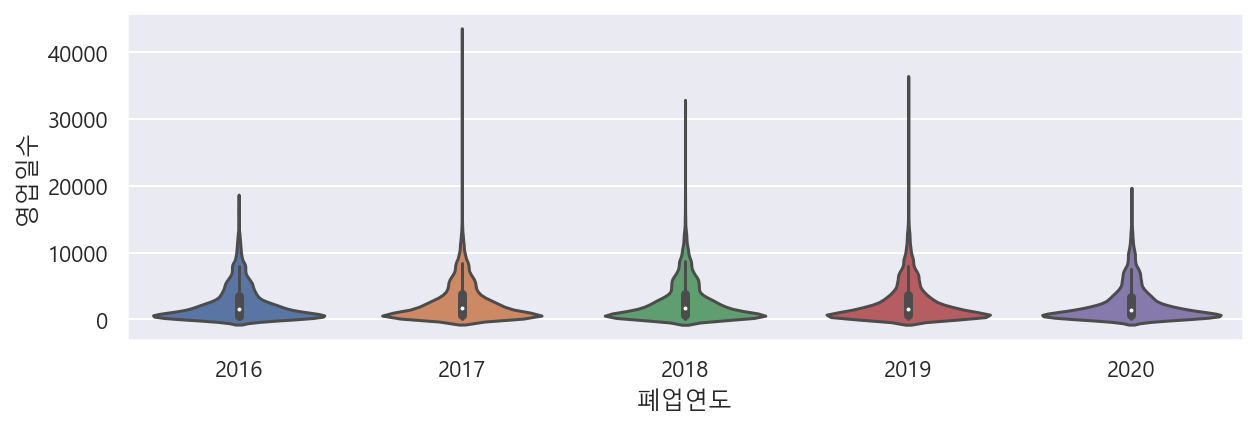

In [115]:
df_compare = pd.concat([df_2016, df_2017, df_2018, df_2019, df_2020])

plt.figure(figsize=(10,3))
sns.violinplot(data=df_compare, x='폐업연도', y="영업일수")

* 영업일수의 평균과 중간값이 2017년을 기준으로 꾸준히 짧아지는것을 확인할 수 있다.
* 2020년의 경우 영업일수의 평균과 중간값이 근 5년사이 가장 짧은것을 볼 수 있다.
* 그래프의 모양이 각 연도별로 비슷한 것을 보았을때 특정성, 이상치 없이 모든 업장이 공통된 영향을 받았음을 확인 할 수 있고,
  이처럼 기존 법칙에서 벗어나지 않음과 동시에 평균값과 중간값이 동시에 줄어들고 있는 것은 영업일수가 길든 짧든간 
  코로나의 영향이 모든 영업체에 미치고 있는것으로 판단할 수 있다.
* 2019년과 비교해보았을때 영업일수의 평균값은 약 100일, 중간값은 약 130일 정도 짧아져 있는 것을 확인할 수 있다. 

# 인허가연도(오픈) 별 업종 비교

In [121]:
# 인허가연도
df_seoul["인허가연도"] = pd.to_numeric(df_seoul["인허가일자"], errors='coerce')
df_seoul["인허가연도"] = df_seoul["인허가연도"].astype('str')
df_seoul["인허가연도"] = df_seoul["인허가연도"].map(make_date_year)

In [122]:
df_seoul["인허가연도"].sample(10)

129343    2002
680241    2020
755       2008
527430    2008
782835    2009
195431    2008
214858    1999
237534    2010
263091    2015
220710    2009
Name: 인허가연도, dtype: object

## 연도 별 업종 오픈 양상

In [143]:
df_seoul["인허가연도(전처리)"] = pd.to_numeric(df_seoul["인허가연도"], errors='coerce')
df_seoul_open = df_seoul[(df_seoul["인허가연도(전처리)"] > 2010.0) & (df_seoul["인허가연도(전처리)"] < 2021.0)].copy()
df_seoul_open.groupby(["개방서비스명", "인허가연도(전처리)"])["사업장명"].count().unstack().round()

인허가연도(전처리),2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
개방서비스명,,,,,,,,,,
골프연습장업,159,88,80,68,52,67,59,83,85,20
공연장,41,36,35,54,58,23,27,32,31,31
국외여행업,359,351,379,352,348,355,362,361,338,114
노래연습장업,237,187,153,147,212,288,234,157,129,64
단란주점영업,57,33,24,45,30,40,31,31,13,10
당구장업,185,169,122,120,212,231,217,142,112,102
미용업,2861,2623,2640,3094,3421,3952,3587,3492,3442,2849
방문판매업,1346,1185,900,854,1035,933,767,657,925,698
세탁업,181,172,177,165,181,173,139,132,120,103


## 연도별 오픈-업종 총합

In [145]:
pd.pivot_table(df_seoul_open, index=["인허가연도(전처리)"], values=["사업장명"],aggfunc='count')

,사업장명
인허가연도(전처리),
2011.0,23160
2012.0,20813
2013.0,20547
2014.0,23661
2015.0,24321
2016.0,26621
2017.0,26815
2018.0,25950
2019.0,26935


## 코로나기간에 오픈한 영업장

In [146]:
df_2020_open = df_seoul[df_seoul["인허가연도"] == "2020"]
g = df_2020_open.groupby(["개방서비스명"])["사업장명"].count()

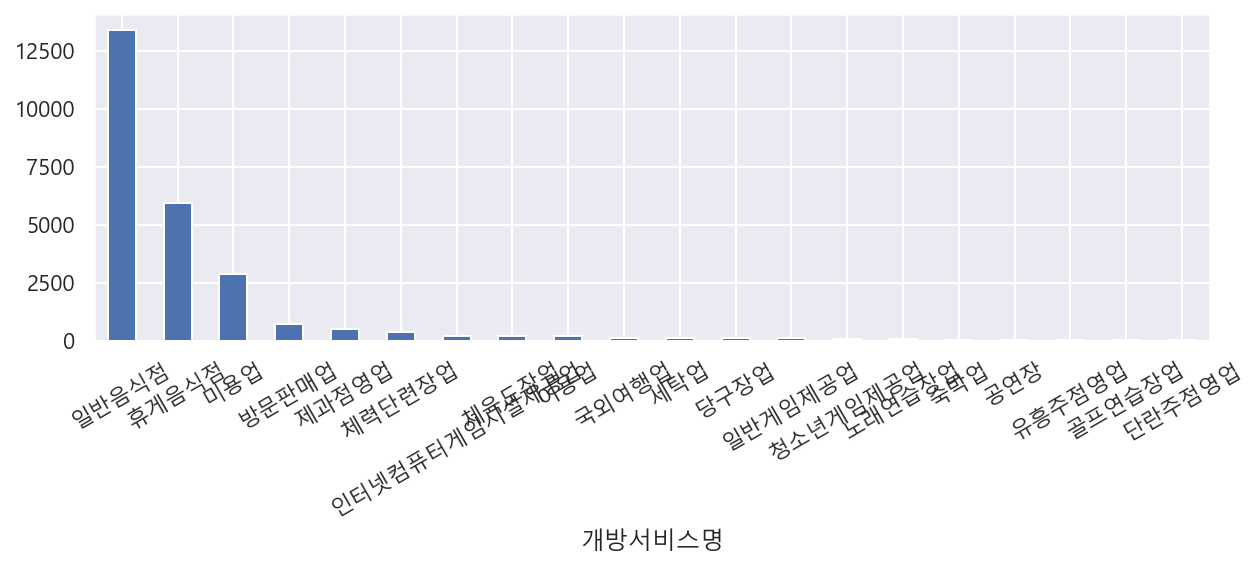

In [147]:
g = g.sort_values(ascending=False)
g.plot.bar(rot=30, figsize=(10,3))

* 2020년에 영업을 시작한 업장의 갯수는 2016년이래 최소, 다른 년도와 비교했을때 미용업, 실내골프장, 여행업, 노래방, 방문판매업, PC게임방의   비율이 큰폭으로 줄었음을 확인할 수 있다. 이처럼 특정 업종의 개업이 큰폭으로 하락한 것은 코로나가 이에 영향을 끼쳤음을 추측할 수 있다. 
* 2020년에 영업을 개시한 상위 5 업종은 각각 일반음식점, 휴게음식점, 미용업, 방문판매업, 제과점영업으로 다른 년도와 크게 다르지 않다.
* 2020년에는 앞서말했듯 방문판매업, 실내스포츠업과 체력단련시설(헬스장), 유흥주점업(+노래방) 등이 많은 폐업을 기록했는데 체력단련시설(헬스장)을 제외한 모든 업종의 영업개시가 큰 폭으로 하락한것을 참고한다면 체력단련시설을 제외한 해당 업종이 빠르게 사라지고 있음을 확인할 수 있다. 

# 코로나 기간, 개업과 동시에 폐업한 영업장과 업종

In [148]:
df_2020_oc = df_seoul[(df_seoul["인허가연도"] == "2020") & (df_seoul["폐업연도"] == "2020")]

In [150]:
pd.pivot_table(df_2020_oc, index=["개방서비스명"], values=["사업장명"],aggfunc='count')

,사업장명
개방서비스명,
골프연습장업,1
국외여행업,5
미용업,99
방문판매업,183
세탁업,5
유흥주점영업,1
이용업,10
인터넷컴퓨터게임시설제공업,23
일반게임제공업,23


* 2020년에 폐업한 모든 업장의 경우 일반음식점이 휴게음식점의 2배가량이었는데, 2020년 오픈과동시에 폐업한 업장의 수의 경우
  일반음식점이 휴게음식점과 같은 수를 기록했다. 코로나의 영향이 휴게음식점에 직접적으로 크게 미치고 있음을 추측할 수 있다.

# 음식점-업태구분명에 따른 폐업 양상

In [152]:
# 전처리

df_food = pd.concat([df13, df14])

food_cols = ["개방서비스명","업태구분명","인허가일자", "영업상태명", "상세영업상태명", "폐업일자", 
        "소재지전체주소", "도로명전체주소", "사업장명", ]

df_food = df_food[food_cols].copy()
df_food.head()

,개방서비스명,업태구분명,인허가일자,영업상태명,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명
0,일반음식점,한식,20200803,영업/정상,영업,NaN,서울특별시 강서구 마곡동 757 두산더랜드파크 B동 207호,"서울특별시 강서구 마곡중앙로 161-8, 두산더랜드파크 B동 2층 207호 (마곡동)",혼밥대왕 마곡점
1,일반음식점,한식,20200803,영업/정상,영업,NaN,서울특별시 강서구 화곡동 827-2 1층,"서울특별시 강서구 등촌로13다길 35, 1층 (화곡동)",꾸어가게생선구이화곡점
2,일반음식점,한식,20200803,영업/정상,영업,NaN,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,"서울특별시 강남구 테헤란로 322, 한신인터밸리24빌딩 지하2층 B130호 (역삼동)",인생갈비탕
3,일반음식점,경양식,20200803,영업/정상,영업,NaN,서울특별시 강남구 삼성동 157-18,"서울특별시 강남구 테헤란로83길 11, 지하2층 비201호, 주방8호 (삼성동)",할랄가이즈
4,일반음식점,한식,20200803,영업/정상,영업,NaN,서울특별시 강남구 대치동 896-28,"서울특별시 강남구 테헤란로68길 25, 지하1층 지하1호 (대치동)",놀부 공유주방 선릉역


In [153]:
# 전처리2
df_food["폐업일자상세"] = pd.to_numeric(df_food["폐업일자"], errors='coerce')
df_food = df_food[(df_food["폐업일자상세"] < 20210202.0) & (df_food["폐업일자상세"] > 20100000.0) | (df_food["폐업일자상세"].isnull()) ].copy()

df_food["폐업연도"] = df_food["폐업일자상세"].astype('str')
df_food["폐업연도"] = df_food["폐업연도"].map(make_date_year)

In [161]:
df_food_2020 = df_food[df_food["폐업연도"] == "2020"]
f = pd.pivot_table(df_food_2020, index=["업태구분명"], values=["사업장명"],aggfunc='count')
f = f.sort_values(by='사업장명', ascending=False)
f[:7]

,사업장명
업태구분명,
한식,4504
기타,1844
커피숍,1795
기타 휴게음식점,1196
호프/통닭,1086
경양식,971
분식,838


* 한식이 제일 높고 커피숍 치킨집 경양식 분식 순으로, 
  비교적 어려운 기술을 들이지 않고 쉽게 시도할 수 있는, 자영업의 영역이라는 점에서 눈여겨 볼 만 하다.

# 서울내 지역(구)별 폐업 양상-음식점 중심

In [195]:
# 전처리
df_seoul['도로명전체주소'] = df_seoul['도로명전체주소'].fillna(df_seoul['소재지전체주소'])
df_seoul['도로명전체주소'].isnull().sum()

0

In [229]:
df_seoul["지역구"] = df["도로명전체주소"].str.split(' ', expand=True)[1] #띄어쓰기로 나눈다 기본적으로/ expand=True 컬럼기준으로
df_seoul["지역구"].head()

0    종로구
1    종로구
2    종로구
3    종로구
4    종로구
Name: 지역구, dtype: object

In [230]:
df_seoul["지역구"].unique()

array(['종로구', nan, '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '진주시', '부평구',
       '의왕시', '용인시', '성남시', '오산시', '부천시', '수원시', '의정부시', '홍성군', '구리시',
       '제주시', '고양시', '광명시', '', '전주시', '삼일대로', '능동로', '광나루로56길', '청계천로',
       '정릉로36길', '한천로', '덕릉로60카길', '동일로', '통일로69길', '은평로11길', '가산디지털1로',
       '장승배기로', '봉천로', '성현로', '신림로', '조원로6길', '관악로', '남구', '역삼로', '테헤란로',
       '해운대구', '양재대로138길'], dtype=object)

In [239]:
# 전처리(서울에 있는 구만 선택)
gu = r'.*((종로|중|용산|성동|광진|동대문|중랑|성북|강북|도봉|노원|은평|서대문|마포|양천|강서|구로|금천|영등포|동작|관악|서초|강남|송파|강동)구).*'

df_seoul_gu = df_seoul[df_seoul["지역구"].str.match(gu, na=False)]
df_seoul_gu.shape

(418506, 15)

In [240]:
# 업종이 음식점인 2010년 이후 폐업하거나 영업중인 업장 데이터
df_seoul_gu = df_seoul_gu[df_seoul_gu["개방서비스명"].str.contains("음식점")]
df_seoul_gu.shape

(275750, 15)

In [243]:
# 업종이 음식점인 2010년 이후 폐업한 업장 데이터.

df_seoul_gu_closed= df_seoul_gu[(df_seoul_gu["개방서비스명"].str.contains("음식점")) & (df_seoul_gu["폐업일자상세"].notnull())]

In [244]:
t = pd.pivot_table(df_seoul_gu_closed, index="지역구", columns="폐업연도", values="사업장명", aggfunc="count").round()

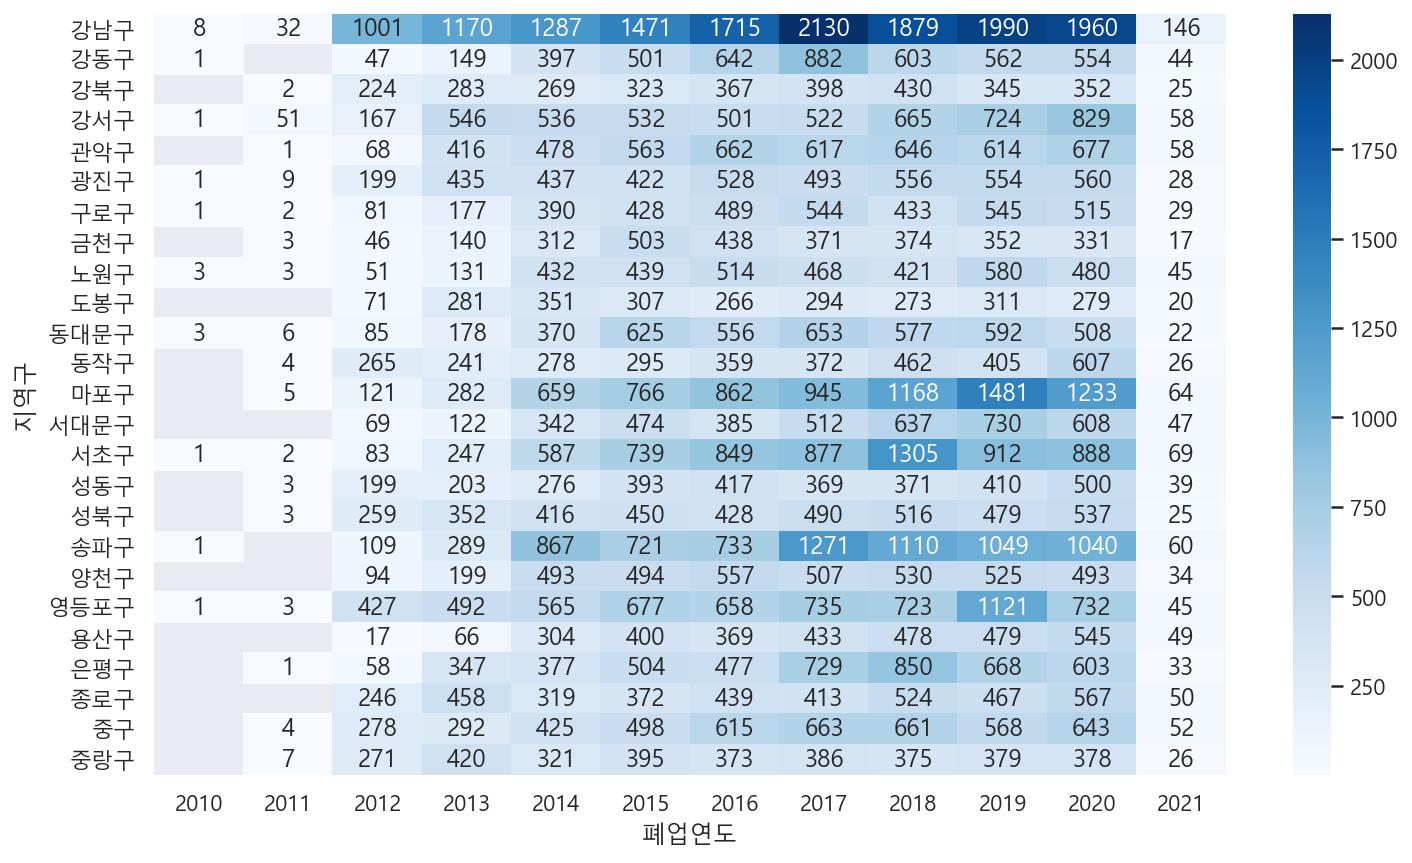

In [245]:
plt.figure(figsize=(12, 7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

* 연도를 불문하고 강남구, 마포구, 송파구, 서초구, 영등포구 가 순위에 들어온다.
* 폐업수가 많은것은 이 지역에 상권이 몰려있는것과 비례하는것으로 추측된다.

In [248]:
df_2020_gu = df_seoul_gu_closed[df_seoul_gu_closed["폐업연도"]== "2020"]
df_2020_gu["지역구"].value_counts()

강남구     1960
마포구     1233
송파구     1040
서초구      888
강서구      829
영등포구     732
관악구      677
중구       643
서대문구     608
동작구      607
은평구      603
종로구      567
광진구      560
강동구      554
용산구      545
성북구      537
구로구      515
동대문구     508
성동구      500
양천구      493
노원구      480
중랑구      378
강북구      352
금천구      331
도봉구      279
Name: 지역구, dtype: int64

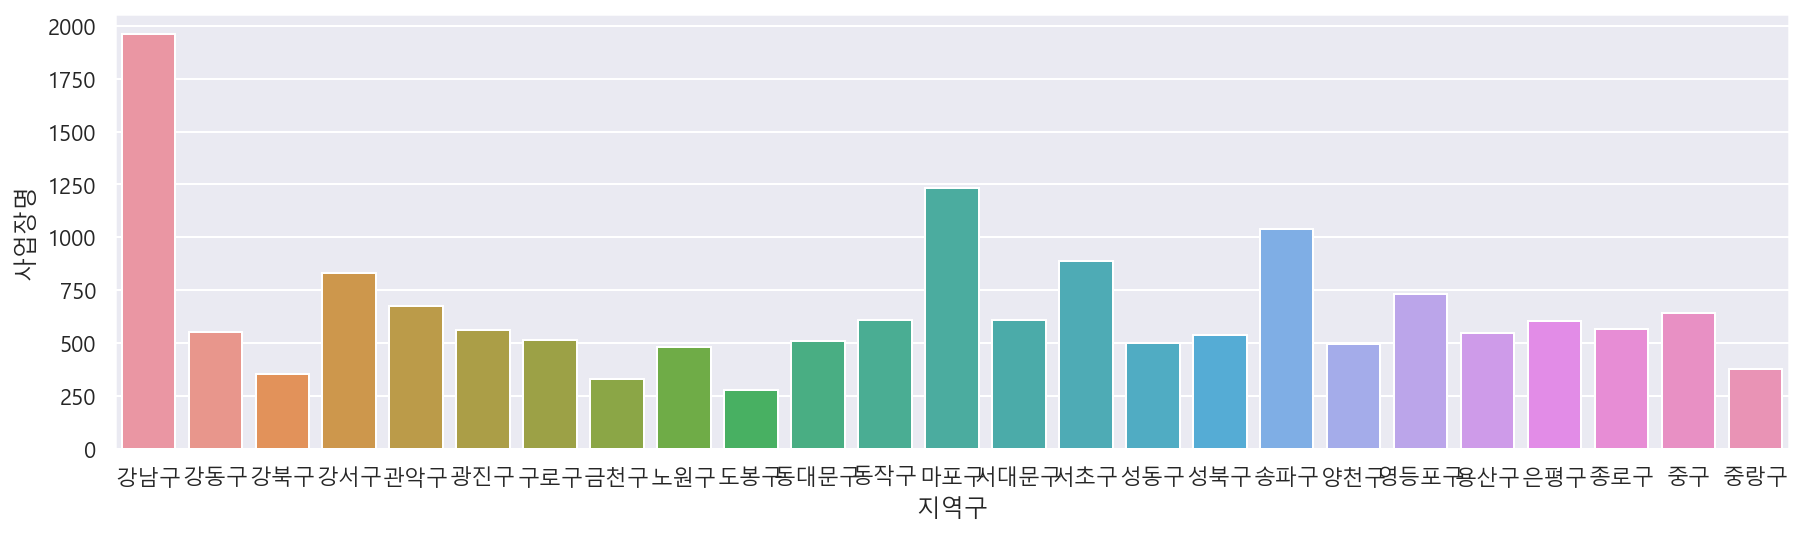

In [254]:
# barplot을 통한 가시화
d2g = df_2020_gu.groupby(["지역구"])["사업장명"].count()
d2g = d2g.reset_index()
plt.figure(figsize=(15, 4))
sns.barplot(data=d2g, x="지역구", y="사업장명")